In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

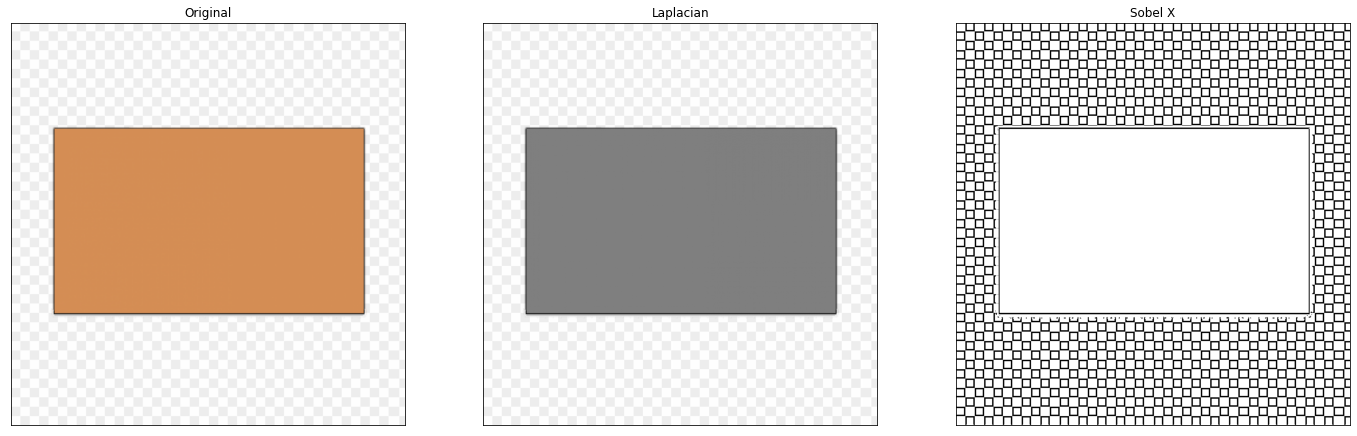

In [27]:
im = cv2.imread('rectangle.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#imgray = cv2.GaussianBlur(imgray,(5,5),0)
#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
#kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()




In [28]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)


cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))



{'m00': 196.0, 'm10': 147882.0, 'm01': 166705.16666666666, 'm20': 111579762.0, 'm11': 125779048.25, 'm02': 141792547.16666666, 'm30': 84191145066.0, 'm21': 94902667686.55, 'm12': 106982476837.25, 'm03': 120606052485.65001, 'mu20': 2793.000000014901, 'mu11': 1.4901161193847656e-08, 'mu02': 3707.4046202003956, 'mu30': -1.52587890625e-05, 'mu21': 233.30000563664362, 'mu12': -2.200854942202568e-05, 'mu03': -37.41416931152344, 'nu20': 0.07270408163304093, 'nu11': 3.878894521513862e-13, 'nu02': 0.09650678415765293, 'nu30': -2.8371342785929962e-11, 'nu21': 0.0004337850405274654, 'nu12': -4.092147137730126e-11, 'nu03': -6.956582322753062e-05}


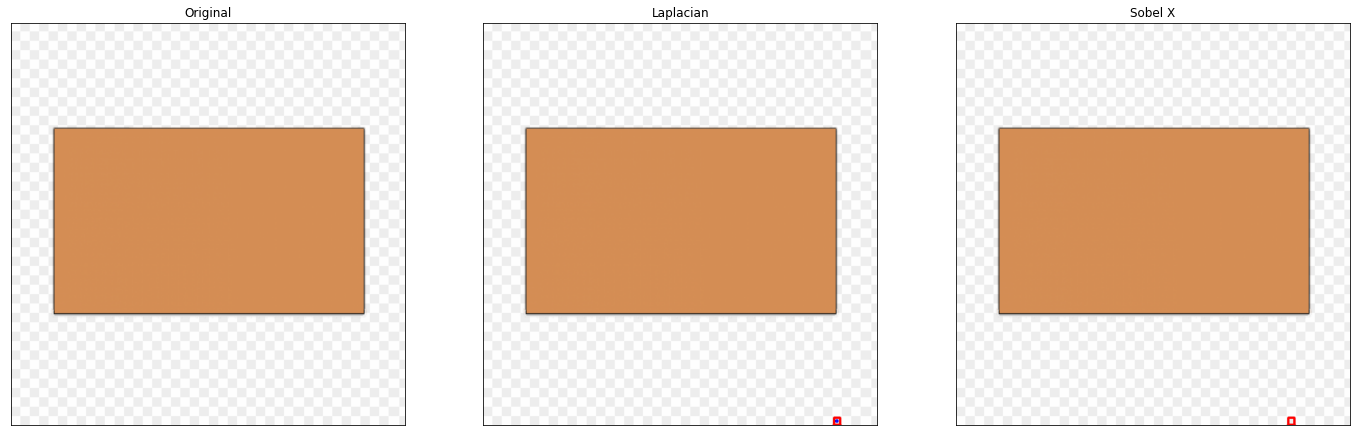

In [29]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()